# 서울에 있는 스타벅스와 이디야 분석
    * 평소에 길을 가다보면 많은 카페가 있는 것을 볼 수 있다.
    * 그중 대표적으로 스타벅스와 이디야를 뽑아 서울에 누가 더욱 많고 어느 지역은 누가 많은지 분석해본다.

## 환경설정

In [3]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
#한글폰트 설정
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
#데이터 불러오기
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep = "|")
df.shape

(573680, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

## 데이터 전처리(1)

In [6]:
#사용하지 않는 컬럼 제거
#사용하는 컬럼만 남기도록 한다.
columns=['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명',
         '시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도']
df = df[columns].copy()
df.shape

(573680, 11)

## 데이터 모델링

In [8]:
#서울만 따로 보기
df_seoul = df[df["시도명"] == "서울특별시"].copy()

In [9]:
#소문자가 들어가는 데이터만 가져오기
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [10]:
#df_cafe에 '스타벅스|starbucks|이디야|이디아|ediya'라는 상호명이 들어간 데이터들을 넣는다
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains('스타벅스|starbucks|이디야|이디아|ediya')].copy()

In [11]:
#브랜드명 컬럼을 만들어서 스타벅스와 이디야로 통일시킨다.
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'), "브랜드명"] = "이디야"
df_cafe[["상호명_소문자", "브랜드명"]]

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야
...,...,...
567090,스타벅스,스타벅스
567828,스타벅스,스타벅스
568636,이디야커피,이디야
570096,스타벅스,스타벅스


## 데이터 전처리(2)

<AxesSubplot:>

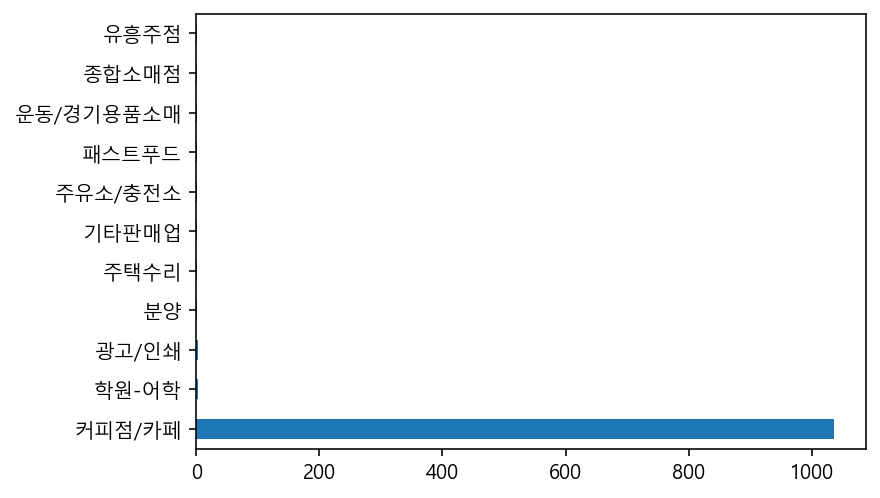

In [12]:
#커피점/카페가 아닌 다른 종류들을 지운다.
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [13]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()

In [14]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

## 데이터 시각화

<AxesSubplot:xlabel='시군구명', ylabel='count'>

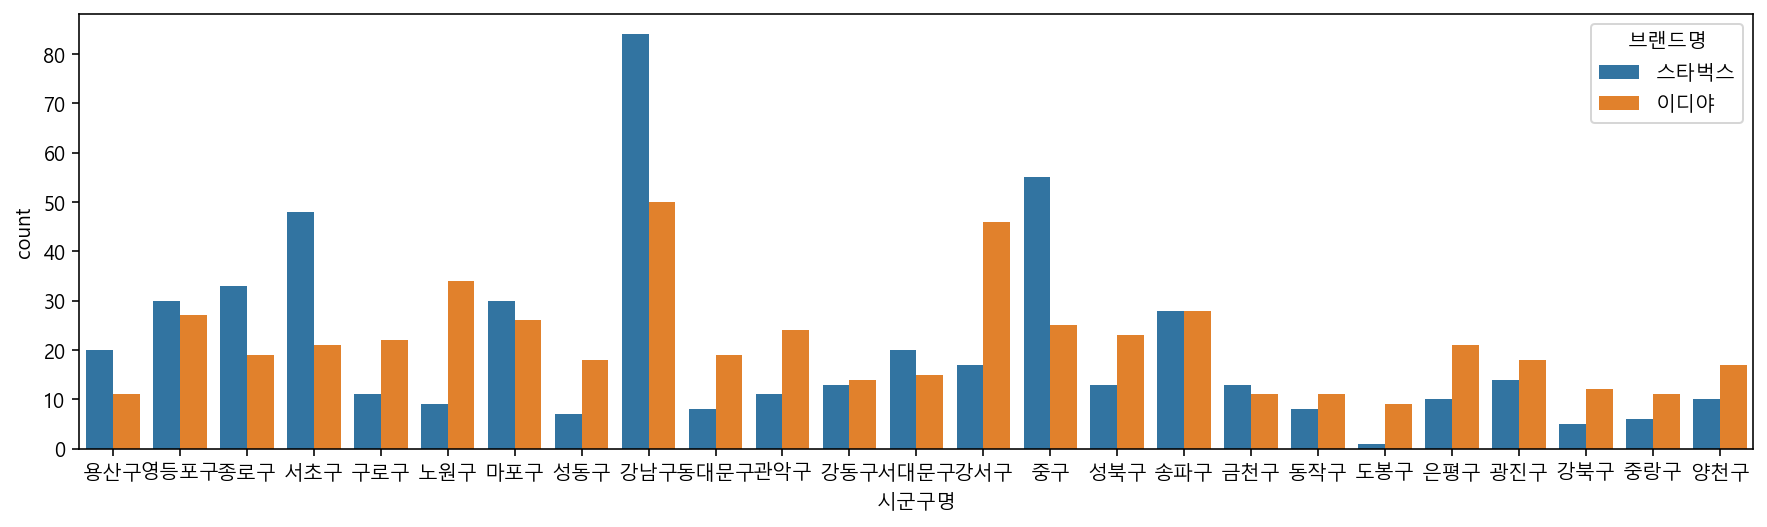

In [17]:
#지역별 스타벅스 이디야 분포수
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

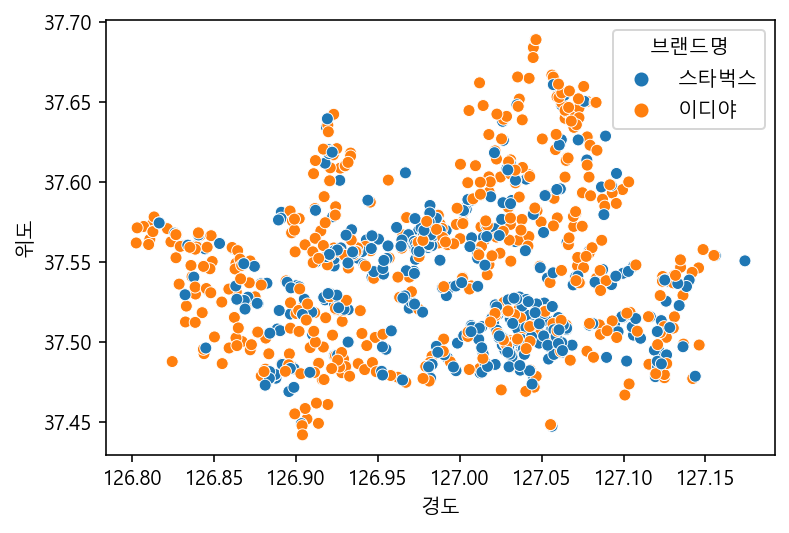

In [20]:
#지역별 스타벅스 이디야 분포

sns.scatterplot(data=df_cafe, x='경도', y='위도', hue='브랜드명')

## 구별 브랜드별 점포수를 그룹화

In [21]:
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
      이디야     12
강서구   스타벅스    17
      이디야     46
관악구   스타벅스    11
      이디야     24
광진구   스타벅스    14
      이디야     18
구로구   스타벅스    11
      이디야     22
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     26
서대문구  스타벅스    20
      이디야     15
서초구   스타벅스    48
      이디야     21
성동구   스타벅스     7
      이디야     18
성북구   스타벅스    13
      이디야     23
송파구   스타벅스    28
      이디야     28
양천구   스타벅스    10
      이디야     17
영등포구  스타벅스    30
      이디야     27
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     19
중구    스타벅스    55
      이디야     25
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [22]:
df_cafe_vs = df_cafe_vs.reset_index()

In [23]:
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [24]:
df_cafe_vs.columns = ['구', '브랜드명', '매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


## folium을 황용한 지도보기

In [26]:
import folium


In [27]:
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()

In [28]:
m = folium.Map([lat, long], zoom_start = 12, tiles = "stamen toner")

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i,"위도"]
    sub_long = df_cafe.loc[i,"경도"]
    
    title = df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i,"도로명주소"]
    
    color = "green"
    if df_cafe.loc[i,"브랜드명"] =="이디야":
        color = "blue"
        
    folium.CircleMarker([sub_lat, sub_long], tooltip=title, radius = 3, color = color).add_to(m)
m

## choropleth를 쓰기위해 GeoJSON파일로드

In [29]:
geo_path = "data/seoul_municipalities_geo_simple.json"
import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json["features"][0]["properties"]["name"]

'강동구'

In [31]:
#df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구한다
#브랜드명 컬럼으로 스타벅스만 가져온다

df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"].copy()
df_star

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11
10,광진구,스타벅스,14
12,구로구,스타벅스,11
14,금천구,스타벅스,13
16,노원구,스타벅스,9
18,도봉구,스타벅스,1


In [35]:
#df_cafe_starbucks로 스타벅스 매장 수 구하기

m= folium.Map([lat,long], tiles = "stamen toner")
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_star,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="스타벅스 매장수",
).add_to(m)
m

In [36]:
#df_cafe_vs 변수에 담긴 값을 통해 이디야의 매장 수를 구한다
#브랜드명 컬럼으로 이디야만 가져온다
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"]=="이디야"].copy()
df_ediya

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24
11,광진구,이디야,18
13,구로구,이디야,22
15,금천구,이디야,11
17,노원구,이디야,34
19,도봉구,이디야,9


In [38]:
m= folium.Map([lat,long], tiles = "stamen toner", zoom_start = 11)
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_ediya,
    columns=["구", "매장수"],
    key_on="feature.properties.name",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="이디야 매장수",
).add_to(m)
m

## 스타벅스와 이디야 비교 분석

In [39]:
df_cafe_vs

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5
5,강북구,이디야,12
6,강서구,스타벅스,17
7,강서구,이디야,46
8,관악구,스타벅스,11
9,관악구,이디야,24


In [40]:
#df_vs라는 변수에 구별 브랜드명을 pivot해서 스타벅스와 이디야 매장을 비교할 수 있는 형태로 만든다
#그리고 ["스타벅스", "이디야"]로 컬럼명을 변경해주고
#스타벅스와 이디야의 매장을 비교한 값을 "매장수비교"컬럼에 담아준다
df_vs = df_cafe_vs.pivot(index="구", columns ="브랜드명", values ="매장수")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0 
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False
광진구,14,18,False
구로구,11,22,False
금천구,13,11,True
노원구,9,34,False


In [41]:
# 스타벅스가 이디야보다 매장수가 많을 때 1을 출력

df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0
광진구,14,18,0.0
구로구,11,22,0.0
금천구,13,11,1.0
노원구,9,34,0.0


In [42]:
#구를 컬럼명으로 하기 위해 reset_index를 한다
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,구,스타벅스,이디야,매장수비교
0,강남구,84,50,1.0
1,강동구,13,14,0.0
2,강북구,5,12,0.0
3,강서구,17,46,0.0
4,관악구,11,24,0.0


In [43]:
# 진한쪽이 스타벅스가 많은쪽 연한쪽이 이디야가 많은쪽이다
m= folium.Map([lat,long], tiles = "stamen toner", zoom_start = 11)
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="매장수 비교",
).add_to(m)


m

In [44]:
df_gu_mean = df_cafe.pivot_table(index="시군구명", values=["경도", "위도"], aggfunc="mean")
df_gu_mean = df_gu_mean.reset_index()
df_gu_mean

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054
5,광진구,127.083297,37.543770
6,구로구,126.877456,37.494061
7,금천구,126.892196,37.469287
8,노원구,127.067171,37.642393
9,도봉구,127.040474,37.665765


In [45]:
# df_vs와 df_gu_mean을 합쳐준다
df_vs = df_vs.merge(df_gu_mean, how="inner", left_on = "구", right_on ="시군구명")
df_vs

,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,관악구,11,24,0.0,관악구,126.935210,37.482054
5,광진구,14,18,0.0,광진구,127.083297,37.543770
6,구로구,11,22,0.0,구로구,126.877456,37.494061
7,금천구,13,11,1.0,금천구,126.892196,37.469287
8,노원구,9,34,0.0,노원구,127.067171,37.642393
9,도봉구,1,9,0.0,도봉구,127.040474,37.665765


In [46]:
m= folium.Map([lat,long], tiles = "stamen toner", zoom_start = 11)
folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=df_vs,
    columns=["구", "매장수비교"],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="매장수 비교",
).add_to(m)
for i in df_vs.index:
    sub_long = df_vs.loc[i,"경도"]
    sub_lat = df_vs.loc[i,"위도"]
    
    cafes =["스타벅스","이디야"]
    for cafe in cafes:
        cafe_count = df_vs.loc[i, cafe]
        
        color = "green"
        gu = df_vs.loc[i,"구"]
        tooltip = f"{gu} {cafe} : {cafe_count}"
        
        radius = np.sqrt(cafe_count) * 3
        
        if cafe == "이디야":
            color = "blue"
            sub_long = sub_long + 0.01
            
        folium.CircleMarker([sub_lat, sub_long],
                           radius = radius,
                            color = color,
                            fill=True,
                            tooltip = tooltip
                           ).add_to(m)

m